Andrew ID: sunayau, adityag4

# Data collection

The dataset for our project is sourced from Kaggle and specifically, we will be utilizing the Faces: Age Detection Dataset curated by the user MÖBIUS. You can find the dataset at this link: https://www.kaggle.com/datasets/arashnic/faces-age-detection-dataset

We have also altered the data a little. For example we removed some labels from train.csv so that we had some NaN entries in order to show the process of imputing missing columns.

To ensure that our age classification model is robust and unbiased, we have incorporated our own dataset into the project. Our dataset is carefully curated to ensure that it has a balanced and representative distribution across all three age groups. This approach allows us to adequately represent each age group and ensure the accuracy and fairness of our model.

We will do this during D3. Once we test our model.

***

# Data Analysis

We will perform exploratory data analysis (EDA) on the collected dataset to gain insights into the distribution of age groups, examine any potential biases or data quality issues, and identify any patterns or trends in the data.

In [1]:
#import all baseic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.dpi']= 100

In [2]:
import os
import skimage
from skimage import io
from tqdm import tqdm
def load_images(path='./images'):
    ids = os.listdir(path)
    images = {}
    for fname in tqdm(ids):
        product_id = fname[:-4]
        try:
            img = io.imread("{}/{}".format(path, fname)) 
            images[product_id] = img
        except:
            print("Error loading ", fname)
    print("Loaded {} images".format(len(images)))
    return images

### Inspect the data

In [3]:
img_folder = "Train"
img_dict = load_images(img_folder)
data = pd.read_csv("train.csv")
data_df = pd.DataFrame(data)
# Check the number of images and their shape sizes
print("Number of images:", len(img_dict))
img_shape = img_dict[list(img_dict.keys())[1]].shape
print("Image shape:", img_shape)


100%|██████████████████████████████████████████████████████████████████████████| 19906/19906 [00:16<00:00, 1215.91it/s]

Loaded 19906 images
Number of images: 19906
Image shape: (387, 309, 3)


In [4]:
print(data_df)

          id   class
0        377  MIDDLE
1      17814   YOUNG
2      21283  MIDDLE
3      16496   YOUNG
4       4487  MIDDLE
...      ...     ...
19901   2482  MIDDLE
19902  20085   YOUNG
19903  19663  MIDDLE
19904  10132  MIDDLE
19905   9896  MIDDLE

[19906 rows x 2 columns]


In [5]:
# Display information about the data frame
print(data_df.info())

# Display statistical summary of the data frame
print(data_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19906 entries, 0 to 19905
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      19906 non-null  int64 
 1   class   19897 non-null  object
dtypes: int64(1), object(1)
memory usage: 311.2+ KB
None
                 id
count  19906.000000
mean   13231.029589
std     7671.492620
min        0.000000
25%     6582.250000
50%    13244.500000
75%    19853.750000
max    26541.000000


The data is a Pandas DataFrame with 19,906 entries (rows) and 2 columns: "id" and "class".

The "id" column contains object (string) data type and has 19,906 non-null values, indicating that there are no missing values in this column. It represents the file names of the images in the dataset, with each row containing a unique file name.

The "class" column also contains object (string) data type and has 19,897 non-null values, indicating that there are 9 missing values in this column. It represents the age classification labels for each image, with three unique values: "MIDDLE", "YOUNG", or "OLD".

The DataFrame has a memory usage of 311.2+ KB.

Further information from the DataFrame shows that there are 19,906 unique values in the "id" column, indicating that each image file name is unique. There are also three unique values in the "class" column: "MIDDLE", "YOUNG", and "OLD". The most frequent value in the "class" column is "MIDDLE", which appears 10,795 times.

Class Counts:
MIDDLE    10795
YOUNG      6706
OLD        2396
Name: class, dtype: int64


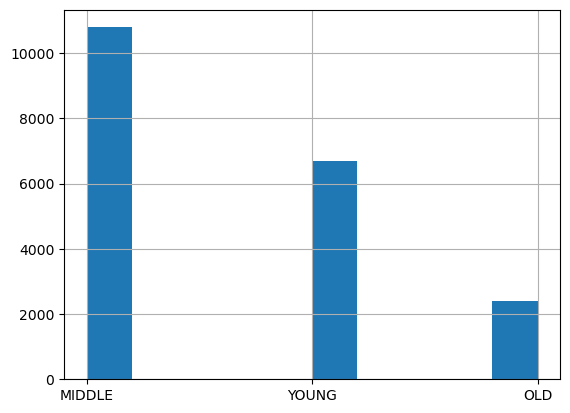

In [6]:
data_df['class'].hist()
class_counts = data['class'].value_counts()

# Print the counts
print("Class Counts:")
print(class_counts)

- "MIDDLE" has a count of 10,795, indicating that this age group appears 10,795 times in the dataset.
- "YOUNG" has a count of 6,706, indicating that this age group appears 6,706 times in the dataset.
- "OLD" has a count of 2,396, indicating that this age group appears 2,396 times in the dataset.

Based on the counts of occurrences for each unique value in the "class" column of the DataFrame, it appears that the data is not evenly balanced across all three age groups. The "MIDDLE" age group has a much higher count of 10,795, while the "YOUNG" age group has a count of 6,706, and the "OLD" age group has a count of 2,396. This indicates that the "MIDDLE" age group is overrepresented compared to the other two age groups, while the "OLD" age group is underrepresented.

***

#### Check for any missing data

In [7]:
# Count the number of NaN entries by column
nan_counts = data.isna().sum()

# Report the results
print(f"Number of NaN entries:\n{nan_counts}\n")

Number of NaN entries:
id       0
class    9
dtype: int64



The dataset contain 9 NaN entries for the class column. We will need to clean the data and impute the categorical column by the most frequent category.

#### Inspecting the images

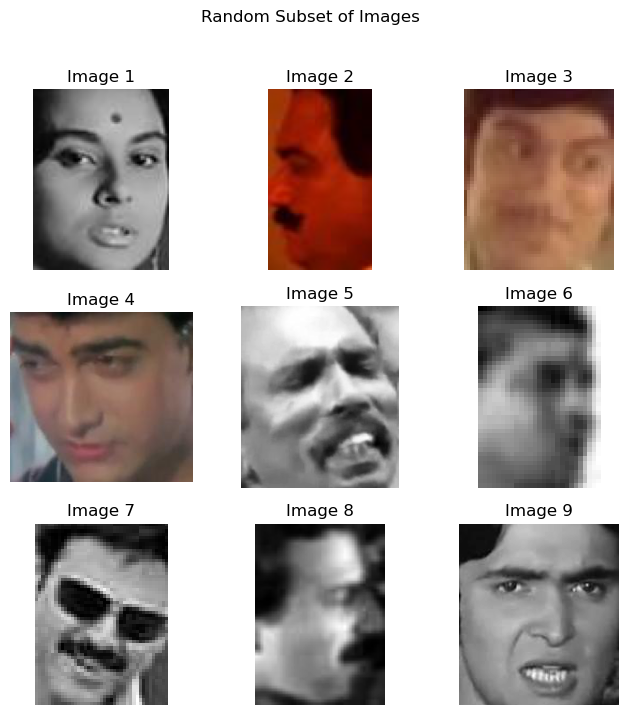

In [8]:
# Select a random subset of images to visualize
num_images = 9
image_keys = np.random.choice(list(img_dict.keys()), size=num_images, replace=False)

# Plot images and their grayscale versions in a 3x3 grid
fig, axes = plt.subplots(3, 3, figsize=(8,8))
for i, ax in enumerate(axes.flatten()):
    img = img_dict[image_keys[i]]
    gray_img = np.dot(img[...,:3], [0.2989, 0.5870, 0.1140])
    ax.imshow(img if i < 4 else gray_img, cmap='gray')
    ax.set_axis_off()
    ax.set_title(f"Image {i+1}")

plt.suptitle("Random Subset of Images")
plt.show()

### Resolution of the Images

In [9]:
image_resolutions = {}
for img_id, img in img_dict.items():
    height, width, _ = img.shape
    image_resolutions[img_id] = (height, width)

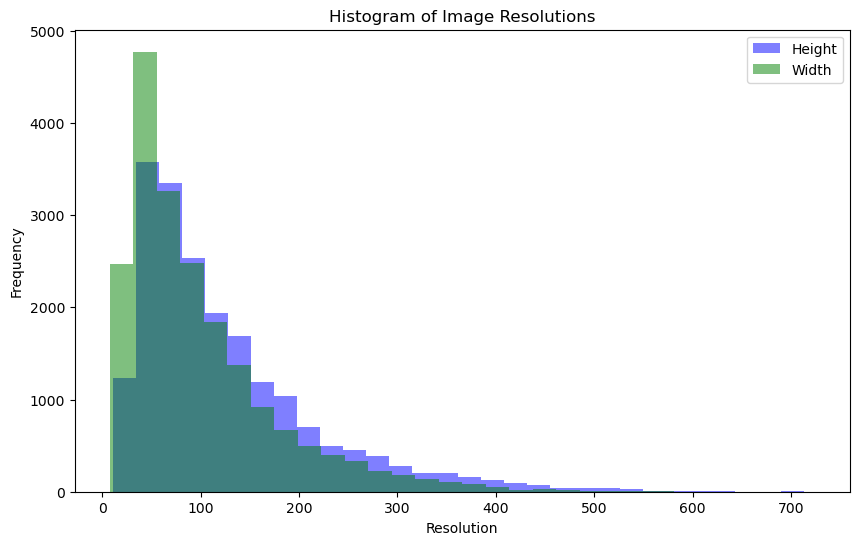

In [10]:
import matplotlib.pyplot as plt

def plot_image_resolution_histograms(image_resolutions):
    """
    Plot histograms of heights and widths from the image_resolutions dictionary.

    Args:
    - image_resolutions (dict): Dictionary containing image resolutions (heights, widths).

    Returns:
    - None
    """
    # Extract the heights and widths from the image_resolutions dictionary
    heights = [res[0] for res in image_resolutions.values()]
    widths = [res[1] for res in image_resolutions.values()]

    # Plot histograms of heights and widths
    plt.figure(figsize=(10, 6))
    plt.hist(heights, bins=30, alpha=0.5, color='blue', label='Height')
    plt.hist(widths, bins=30, alpha=0.5, color='green', label='Width')
    plt.xlabel('Resolution')
    plt.ylabel('Frequency')
    plt.title('Histogram of Image Resolutions')
    plt.legend()
    plt.show()

plot_image_resolution_histograms(image_resolutions)

Based on the histogram, it appears that the majority of the images have heights and widths in the range of 50-150 pixels. However, there are some images with resolutions that are either too low or too high. Images with low resolutions may need to be removed, while images with high resolutions may need to be scaled down to ensure consistency in the dataset. Further analysis and processing may be necessary to address these issues and ensure that the dataset is suitable.

Additionally if we want to use CNN, we will need all the images to be of the same size. So we will need to process the image and make it of the same size as everyone else.

## Data Wrangling 

Here we will pre-process the collected data by cleaning and formatting the images, handling missing values or outliers, and ensuring the data is in a suitable format for training the machine learning model.

Specifically, we will make all the images of a similar resolution. And clean the data and impute the categorical column by the most frequent category. We will also change categorical data into numeric data.

#### Impute missing categorical columns

In [11]:
def impute_categorical_features(data):
    # Get the list of categorical columns
    cat_cols = data.select_dtypes(include=['category', 'object']).columns.tolist()

    # Impute missing values with mode
    for col in cat_cols:
        mode = data[col].mode()[0]
        data[col].fillna(mode, inplace=True)
    
    return data

data = impute_categorical_features(data)
nan_counts = data.isna().sum()

# Report the results
print(f"Number of NaN entries:\n{nan_counts}\n")

Number of NaN entries:
id       0
class    0
dtype: int64



We have removed all the NaN entries from our dataset.

### Fix resolutions and Image Filtering

#### Image filtering 

Preprocessing filter can sometimes be conveniently applied to an image in order to improve its quality (for future classification) in terms of
removing noise, enhancing contrast, smooth values, emphasize changes, and so on.

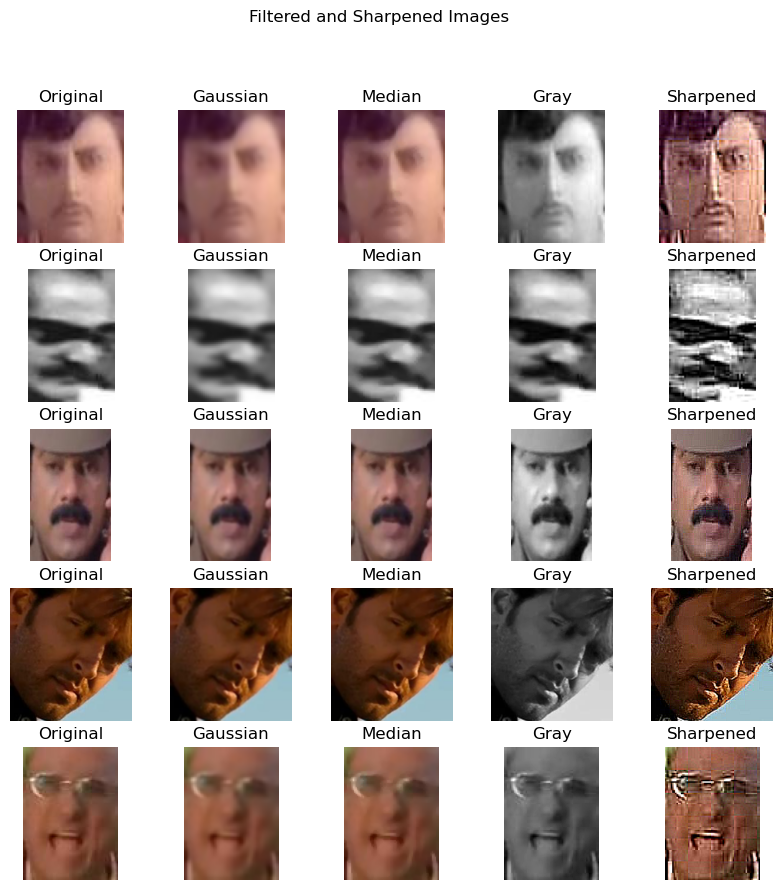

In [12]:
import cv2

GAUSSIAN_KERNEL_SIZE = 5
MEDIAN_KERNEL_SIZE = 3
BILATERAL_D = 9
BILATERAL_SIGMA_COLOR = 75
BILATERAL_SIGMA_SPACE = 75

num_images = 5
image_keys = np.random.choice(list(img_dict.keys()), size=num_images, replace=False)

# Plot original and filtered images in a 5x5 grid
fig, axes = plt.subplots(5, 5, figsize=(10,10))
for i, key in enumerate(image_keys):
    img = img_dict[key]
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # Apply Gaussian filter
    gaussian_img = cv2.GaussianBlur(img, (GAUSSIAN_KERNEL_SIZE, GAUSSIAN_KERNEL_SIZE), 0)
    
    # Apply Median filter
    median_img = cv2.medianBlur(img, MEDIAN_KERNEL_SIZE)
    
    # Apply Laplacian filter
    laplacian_img = cv2.Laplacian(gray_img, cv2.CV_64F)
    
    # Perform image sharpening using filter2D
    sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]]) # Sharpening kernel
    sharpened_img = cv2.filter2D(img, -1, sharpen_kernel)
    
    # Plot images
    axes[i][0].imshow(img)
    axes[i][0].set_title("Original")
    axes[i][1].imshow(gaussian_img)
    axes[i][1].set_title("Gaussian")
    axes[i][2].imshow(median_img)
    axes[i][2].set_title("Median")
    axes[i][3].imshow( gray_img, cmap="gray")
    axes[i][3].set_title("Gray")
    axes[i][4].imshow(sharpened_img)
    axes[i][4].set_title("Sharpened")
    
    for j in range(5):
        axes[i][j].set_axis_off()

plt.suptitle("Filtered and Sharpened Images")
plt.show()

After careful consideration, it appears that the unfiltered <b>gray</b> picture may be the most suitable option for the task at hand. The unfiltered <b>gray</b> image showcases the natural features of the face without any additional enhancements, providing an authentic representation. Alternatively, the sharpened version could also be a viable option, as it enhances the distinct features of the face, adding definition and clarity. Therefore, utilizing the sharpened version could be a potential alternative for the task

#### Fix resolutions

In [13]:
import os
import cv2
import skimage
from skimage import io
from tqdm import tqdm
from skimage.transform import rescale

def remove_low_resolution_images(img_dict, min_height=15, min_width=15):
    """
    Remove low-resolution images from the dictionary of loaded images.
    """
    img_dict_filtered = {}
    for product_id, img in img_dict.items():
        height, width, _ = img.shape
        if height >= min_height and width >= min_width:
            img_dict_filtered[product_id] = img
    print("Removed {} low-resolution images".format(len(img_dict) - len(img_dict_filtered)))
    return img_dict_filtered

# Image preprocessing
def preprocess_image(img):
    img = cv2.convertScaleAbs(img)
    # Resize image to 128x128 while maintaining aspect ratio
    img = cv2.resize(img, (128, 128))
    # Normalize pixel values
    return img

def preprocess_all(img_dict):
    processed_images = {}
    for img_id, img in img_dict.items():
        processed_images[img_id] = preprocess_image(img)
    print("Processed all images.")
    return processed_images

In [14]:
img_dict_filtered = remove_low_resolution_images(img_dict)
processed_img = preprocess_all(img_dict_filtered)

Removed 69 low-resolution images
Processed all images.


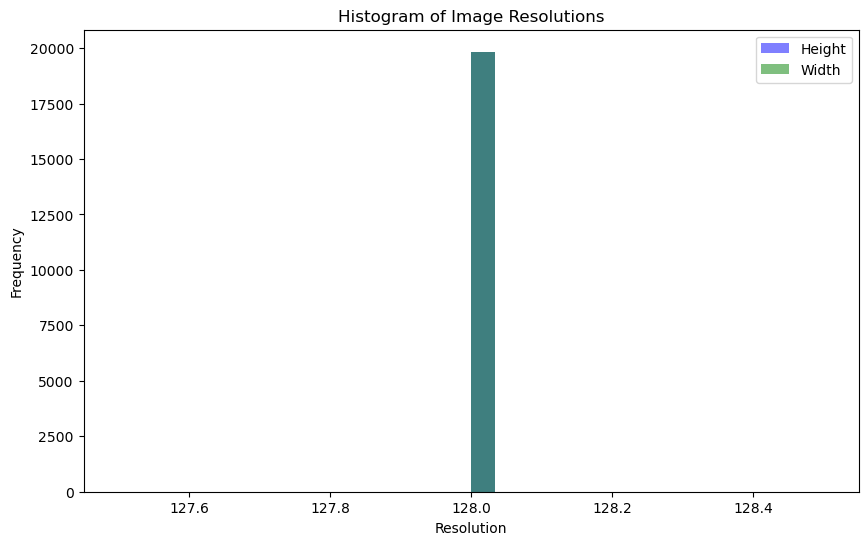

In [15]:
img_resolutions = {}
for img_id, img in processed_img.items():
    height, width, _ = img.shape
    img_resolutions[img_id] = (height, width)

plot_image_resolution_histograms(img_resolutions)

We have filtered out images with low resolution, and further standardized the remaining images by scaling them to a consistent resolution. These preprocessing steps are intended to optimize the machine learning task

### Change categorical data into numeric data

In [16]:
print(data['class'].unique())

['MIDDLE' 'YOUNG' 'OLD']


In [17]:
data['class'].replace(['YOUNG', 'MIDDLE','OLD'], [0, 1, 2], inplace=True)
data.head(3)

,id,class
0,377,1
1,17814,0
2,21283,1


We have transformed all categorical data into numerical data as part of the data preprocessing steps to facilitate the machine learning task.

***

# Extract features

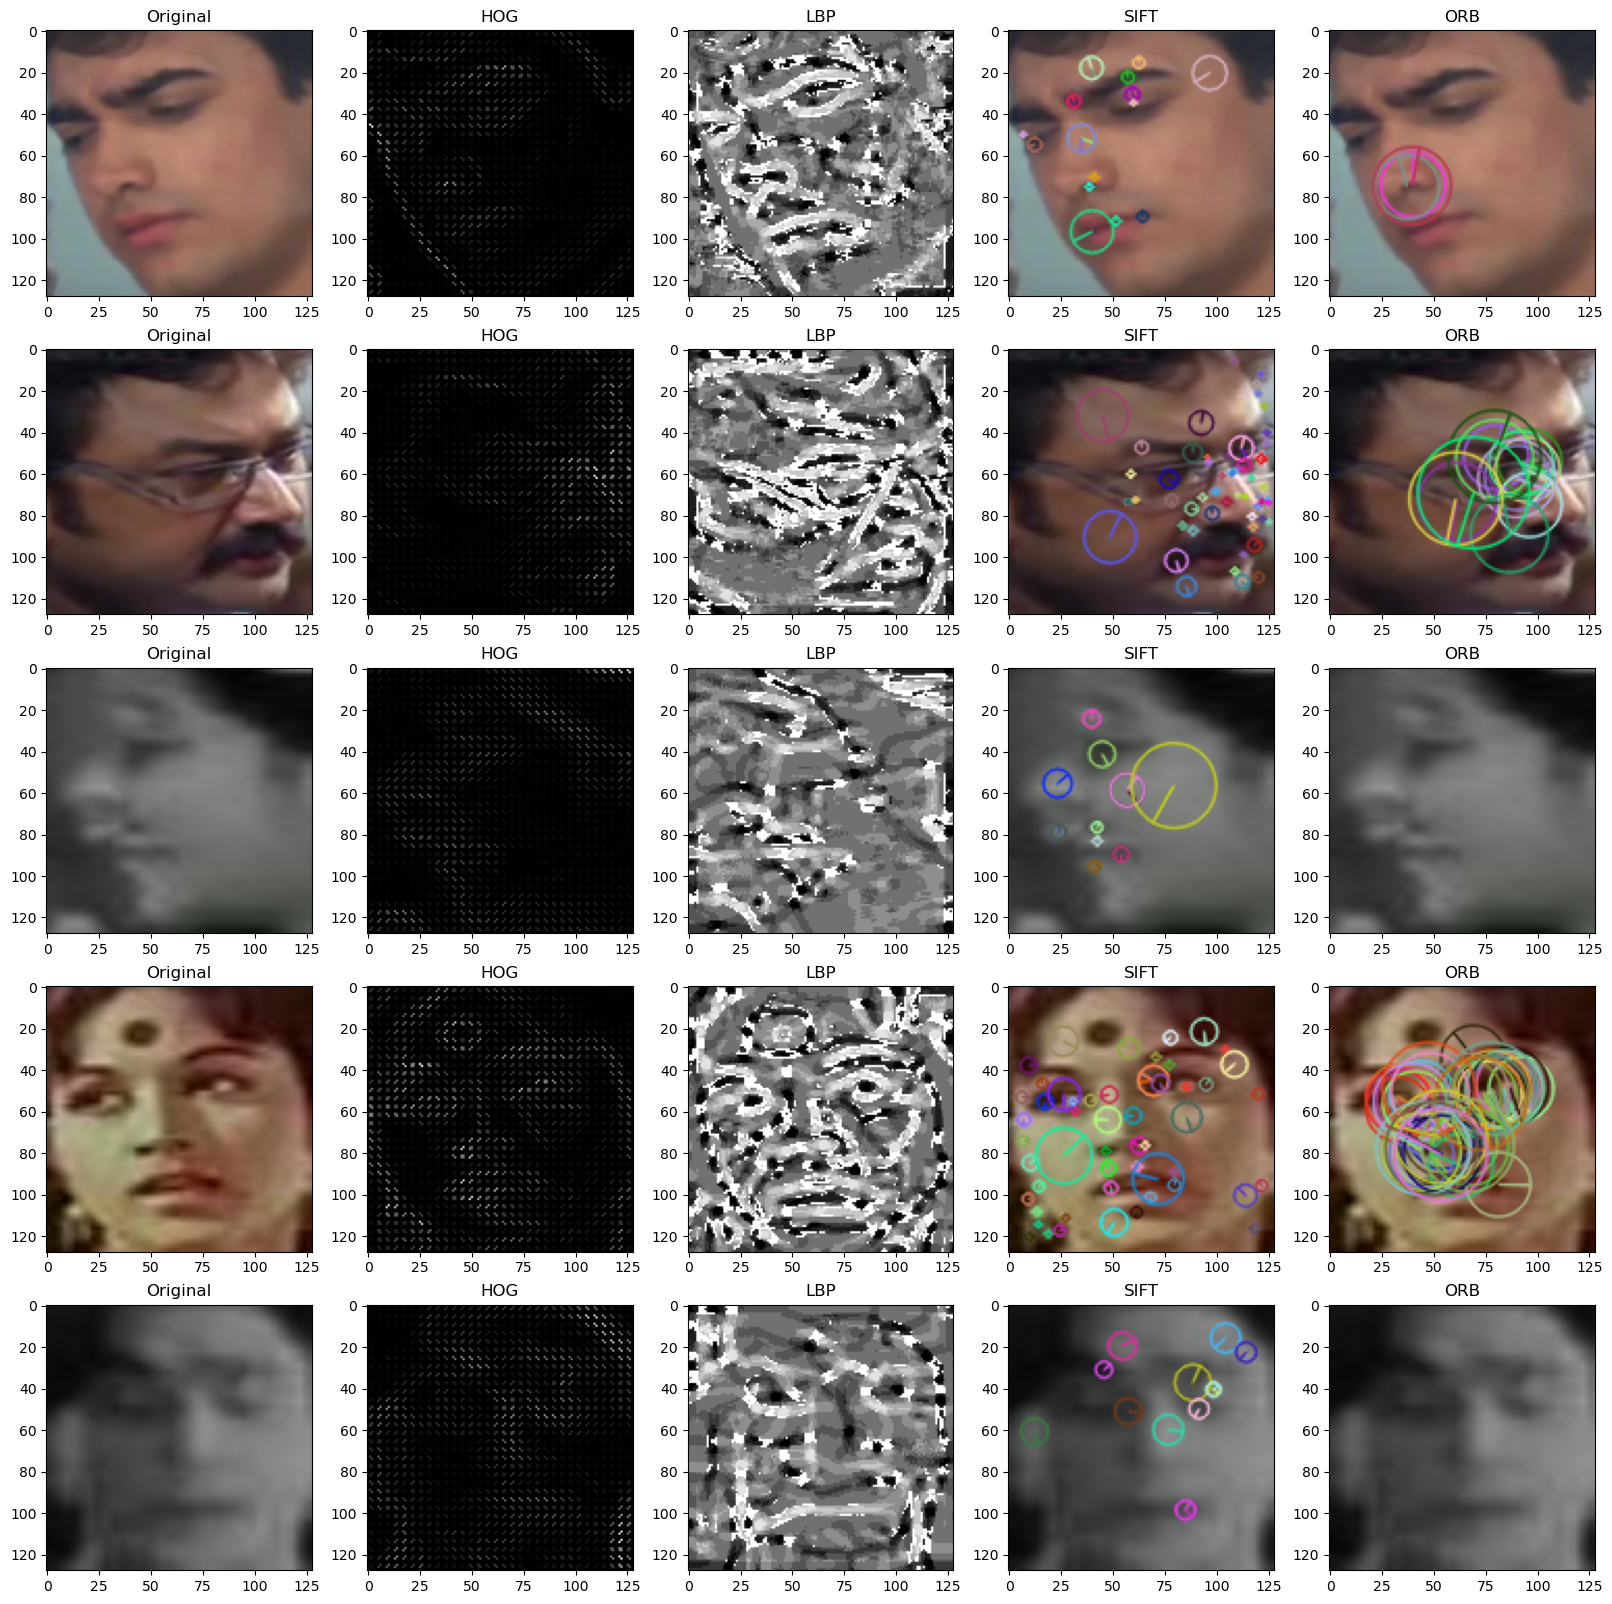

In [18]:
img_dict =  processed_img
from skimage.feature import hog, local_binary_pattern

# Select a random subset of images to visualize
num_images = 5
image_keys = np.random.choice(list(img_dict.keys()), size=num_images, replace=False)

# Create SIFT object
sift = cv2.xfeatures2d.SIFT_create()

# Create ORB object
orb = cv2.ORB_create()

# Plot original and filtered images in a 5x5 grid
fig, axes = plt.subplots(5, 5, figsize=(20,20))
for i, key in enumerate(image_keys):
    img = img_dict[key]
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Extract HOG feature
    hog_feature, hog_image = hog(gray_img, orientations=8, pixels_per_cell=(4, 4), cells_per_block=(1, 1), visualize=True)
    
    # Extract LBP feature
    lbp_feature = local_binary_pattern(gray_img, P=8, R=5, method='uniform')
    
    # Extract SIFT feature
    kp_sift, sift_descriptors = sift.detectAndCompute(img, None)
    
    # Extract ORB feature
    kp_orb, orb_descriptors = orb.detectAndCompute(gray_img, None)
    
    # Plot images and features
    axes[i][0].imshow(img)
    axes[i][0].set_title("Original")
    axes[i][1].imshow(hog_image, cmap='gray')
    axes[i][1].set_title("HOG")
    axes[i][2].imshow(lbp_feature, cmap='gray')
    axes[i][2].set_title("LBP")
    axes[i][3].imshow(cv2.drawKeypoints(img, kp_sift, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS))
    axes[i][3].set_title("SIFT")
    axes[i][4].imshow(cv2.drawKeypoints(img, kp_orb, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS))
    axes[i][4].set_title("ORB")

In [19]:
#filter the data
img_dict = {int(k): v for k, v in img_dict.items()}
data_df['id'] = data_df['id'].astype(int)
filtered_data_df = data_df[data_df['id'].isin(img_dict.keys())]
# Make the images and data all sorted
images_list = img_dict.items()
images = sorted(images_list)
df_labels = filtered_data_df.sort_values('id', ignore_index=True)
df_labels = filtered_data_df['class']

#### Functions to extract different features from the images:

In [20]:
import numpy as np
from skimage.color import rgb2gray
from skimage.feature import local_binary_pattern
from sklearn.model_selection import train_test_split


# Define a function to extract LBP features from images
def get_lbp_features(X, radius=1, n_points=8):
    n_features = radius * n_points
    features = np.empty((len(X), n_features + 1))
    for i, (product_id, image) in enumerate(X):
        img_gs = rgb2gray(image)
        lbp = local_binary_pattern(img_gs, n_points, radius)
        hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 2), density=True)
        features[i] = hist
    return features

X_train, X_test, Y_train, Y_test = train_test_split(images, df_labels, test_size=0.25, random_state=99)

# Extract LBP features from training and test images
radius = 1
n_points = 8
LBP_features_train = get_lbp_features(X_train, radius=radius, n_points=n_points)
LBP_features_test = get_lbp_features(X_test, radius=radius, n_points=n_points)

Here we extract LBP features from the images and put them in their respective variables for later use.

In [21]:
# Define a function to extract ORB features from images
# Define a function to extract ORB features from images
def get_orb_features(X):
    orb = cv2.ORB_create()
    max_descriptors = 500  # Set a maximum number of descriptors per image
    features = []
    for product_id, image in X:
        img_gs = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        keypoints, descriptors = orb.detectAndCompute(img_gs, None)
        # Zero pad the descriptors to a fixed length
        if descriptors is not None:
            descriptors = np.pad(descriptors, ((0, max_descriptors - descriptors.shape[0]), (0, 0)), mode='constant')
        else:
            descriptors = np.zeros((max_descriptors, orb.descriptorSize()), dtype=np.uint8)
        features.append(descriptors.flatten())
    return np.array(features)

# Extract ORB features from training and test images
ORB_features_train = get_orb_features(X_train)
ORB_features_test = get_orb_features(X_test)

Here we extract ORB features from the images and put them in their respective variables for later use.

In [22]:
# Define a function to extract SIFT features from images
def get_sift_features(X):
    sift = cv2.xfeatures2d.SIFT_create()
    max_descriptors = 500  # Set a maximum number of descriptors per image
    features = []
    for product_id, image in X:
        img_gs = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        keypoints, descriptors = sift.detectAndCompute(img_gs, None)
        # Zero pad the descriptors to a fixed length
        if descriptors is not None:
            descriptors = np.pad(descriptors, ((0, max_descriptors - descriptors.shape[0]), (0, 0)), mode='constant')
        else:
            descriptors = np.zeros((max_descriptors, 128), dtype=np.float32)
        features.append(descriptors.flatten())
    return np.array(features)

# Extract SIFT features from training and test images
SIFT_features_train = get_sift_features(X_train)
SIFT_features_test = get_sift_features(X_test)

Here we extract LBP features from the images and put them in their respective variables for later use.

We didn't use hog because it took a very long time to process all the images and the code never ran to completion.

In [23]:
all_features_train = np.hstack((SIFT_features_train, ORB_features_train, LBP_features_train))
all_features_test = np.hstack((SIFT_features_test, ORB_features_test, LBP_features_test))

Here we join all of the features and put them in their respective variables for later use.